# Matplotlib Line Plots

## Introduction
In this section we are going to learn how to create simple line plots with Matplotlib.

Before we dive in, let's cover a few introductory matters.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy, we will use some standard shorthands for Matplotlib imports. Same disclaimer goes for these aliases as the others.

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles
While we will get into adjusting individual pieces of our plots appearances, you can change many of the properties at once by selecting a style.

In [5]:
# You can see the available styles like so
# See what they look like here (warning, bad HTML design): 
# https://matplotlib.org/examples/style_sheets/style_sheets_reference.html?highlight=style%20sheets%20reference
# plt.style.available

In [6]:
# Select a style, it will affect all subsequent plots.
plt.style.use('seaborn')

### How to Display Your Plots in Jupyter Notebooks

Your textbook has information about how to display plots in a variety of environments, but we are only interested in how to display them in your Jupyter notebooks.

In [7]:
# Add this after your imports to configure Jupyter to 
# display your plots.
%matplotlib inline

### MATLAB-Style vs. Object Oriented Interface
One of the reason that Matplotlib can be confusing to beginners (or anyone who isn't constantly using it) is that it presents to different interfaces. Your textbook opts for relying on the MATLAB style interface, but we will not do so.

We will stick with the object-oriented approach, which is more consistent with the language as a whole and gives you more control over your plots.

### The Anatomy of a Plot
Before we go any farther, let's define some terms Matplotlib terms:
* Every plot/chart is made of one **`figure`** object and 1 or more **`axes`** objects
* The **`figure`** object is more or less just a container
* Each **`axes`** object is a graphical representation of data that exists inside the figure.
    * Most often, a *`figure`* will contain only one *`axes`* but that is not always the case as we will learn in later.

## Simple Line Plots

In [8]:
# Load and set the index column to be the player's jersey number.
nd_football_roster = pd.read_csv('./data/nd-football-2018-roster.csv', index_col='Number')
nd_football_roster.head()

,Name,Position,Height,Weight,Class,Hometown
Number,,,,,,
2,Dexter Williams,RB,71,215,Sr.,"Orlando, FL/West Orange"
2,Jordan Genmark Heath,LB,73,225,Soph.,"San Diego, CA/Cathedral Catholic"
3,Avery Davis,QB,71,204,Soph.,"Cedar Hill, TX/HS"
3,Houston Griffith,S,72,205,Fr.,"Chicago, IL/IMG Academy (FL)"
4,Te'von Coney,LB,73,240,Sr.,"Palm Beach Gardens, FL/HS"


In order to create a plot, we have to have the two essential components mentioned above - a **`figure`** object and a **`axes`** object.

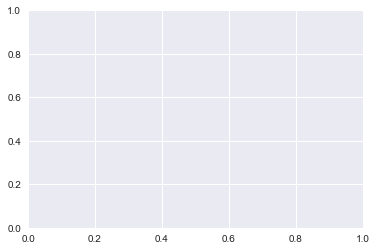

In [6]:
# You can get them like this
figure = plt.figure()
axes = plt.axes()

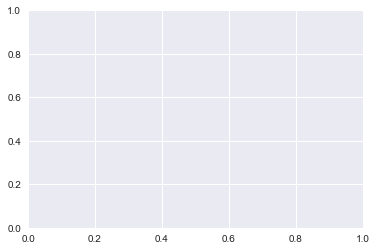

In [7]:
# Or you can use the `plt.subplots()` method 
# as a shortcut. You'll come back to using this
# later when you have multiple axes in a
# single figure.

# This is the style I'll generally use.
figure, axes = plt.subplots()

**Congratulations!** You've made your first plots. Aren't they beautiful?

Well, maybe that is a bit of a stretch. After all, the don't actually have anything on them.
Let's fix that.

### Plotting Your First Data
Let's plot the heights of the players.

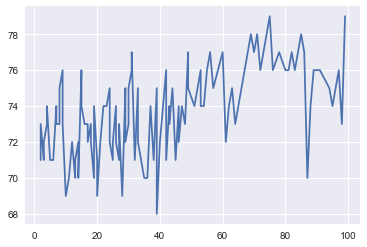

In [8]:
# Get the objects
figure, axes = plt.subplots()

# Use the `plot()` method to "write" data on your axes.
# The first argument is used as the x-axis
# The second is used for the y-axis
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

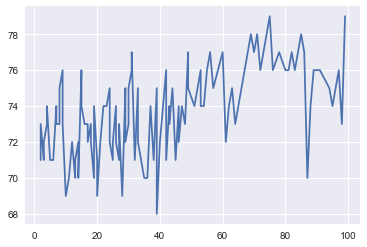

In [9]:
# in some cases, for a quick visualization, you can pass in a series by itself
figure, axes = plt.subplots()
axes.plot(nd_football_roster['Height'])

You can display multiple datasets on a single **`axes`** object. Let's divide the *`nd_football_roster['Height']`* series into two parts and display them as separate lines.

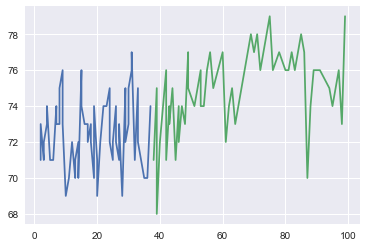

In [10]:
figure, axes = plt.subplots()

# The dataset has 116 players, so we display 58 of them
# on each call to the `plot()` method.
axes.plot(nd_football_roster.index[:58], nd_football_roster['Height'][:58])
axes.plot(nd_football_roster.index[58:], nd_football_roster['Height'][58:])

## Activity

In this activity we will use the flight_sample.csv dataset. We will learn both the group by and plotting the data. 

### GroupBy and Plotting

We want to see if the day of the week has any effect on average distance traveled by airline customers

1. Compute the average DISTANCE per 'DAY_OF_WEEK'
2. Visualize the average distance travelled and the day of the week
3. What do you interpret from the visualization? 
    

In [11]:
flights= pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [20]:
# group by day of week and get the average distance for each
avg_distance_by_day = flights.groupby(['DAY_OF_WEEK'])['DISTANCE'].mean()
# avg_distance_by_day

In [16]:
# in two steps...
flights_by_day = flights.groupby(['DAY_OF_WEEK'])
avg_distance_by_day = flights_by_day['DISTANCE'].mean()
avg_distance_by_day

DAY_OF_WEEK
1    831.389308
2    798.276406
3    823.074586
4    805.929175
5    839.384409
6    844.931260
7    835.920635
Name: DISTANCE, dtype: float64

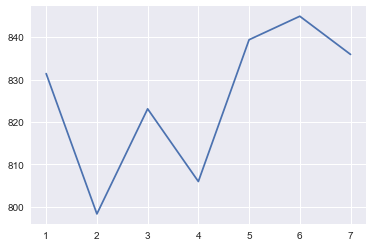

In [19]:
# create the figure and axes and plot the means
fig,axes = plt.subplots()
axes.plot(avg_distance_by_day.index, avg_distance_by_day)

### Adjusting Line Properties
There are a number of line properties that you can adjust via keyword parameters to the *`plot()`*. 

Let's explore a few of them here: **`alpha`, `color`, `linestyle`, `linewidth`, `marker` and `markersize`.**

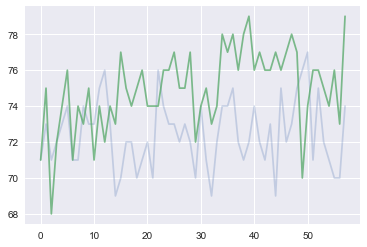

In [21]:
figure, axes = plt.subplots()

# The alpha parameter determines how transparent a line will be.
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], alpha=.25)
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], alpha=.75)

Matplotlib allows you to specify color choices in a very wide variety of ways. In the following example, I'll divide up our players into groups of ten to show some of the various ways to specify line color.

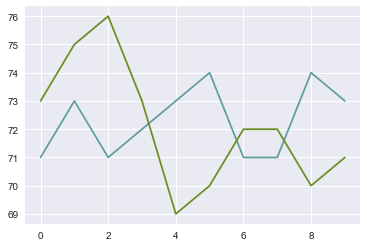

In [25]:
figure, axes = plt.subplots()

# SURPRISE... the color parameter controls the color of your line.

# You can specify any HTML color. 
# https://www.w3schools.com/colors/colors_names.asp
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='CadetBlue')
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20],
          color='OliveDrab')

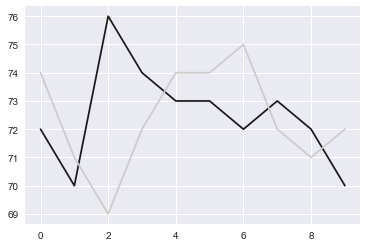

In [26]:
figure, axes = plt.subplots()

# Floats between 0 and 1 specify grayscale values
# But notice they have to be passed as strings
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          color='.1')
axes.plot(np.arange(0,10), nd_football_roster['Height'][30:40], 
          color='.8')

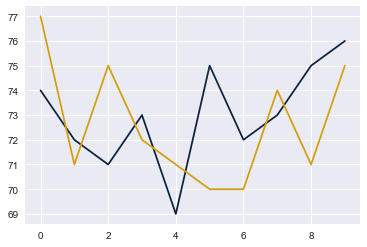

In [27]:
figure, axes = plt.subplots()

# Hex Codes are acceptable (#RRGGBB)
# Google for: hex color picker

# https://onmessage.nd.edu/university-branding/colors/

axes.plot(np.arange(0,10), nd_football_roster['Height'][40:50], 
          color='#0c2340')
axes.plot(np.arange(0,10), nd_football_roster['Height'][50:60], 
          color='#ae9142')


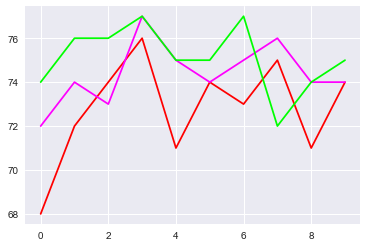

In [28]:
figure, axes = plt.subplots()

# You can even specify RGB tuples
# Each component of the tuple is a float between 0 and 1
axes.plot(np.arange(0,10), nd_football_roster['Height'][60:70], 
          color=(1.0, 0, 0)) # Total Red
axes.plot(np.arange(0,10), nd_football_roster['Height'][70:80], 
          color=(1.0, 0, 1.0)) # Pure Purple
axes.plot(np.arange(0,10), nd_football_roster['Height'][80:90], 
          color=(0.0, 1.0, 0.0)) # Gorgeous Green

#### Line Style
The *`linestyle`* parameter can take any of the options in the following table. You can specify either the or the symbol of the option:

| Name | Symbol|
|--------|-------|
| solid  | -     |
| dashed | --    |
| dashdot  | -.     |
| dotted  | :     |
|--------|-------|

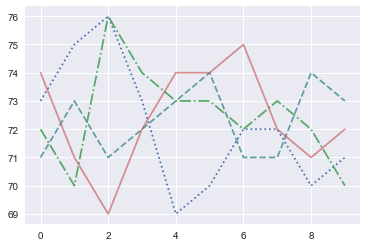

In [29]:
figure, axes = plt.subplots()

# Specifying with name
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='CadetBlue', linestyle='dashed')
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted')

# Specifying with symbol
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          linestyle='-.')
axes.plot(np.arange(0,10), nd_football_roster['Height'][30:40], 
          linestyle='-', alpha=.6)

#### Line Width

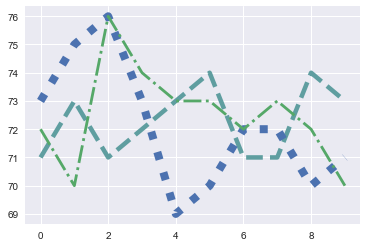

In [30]:
# Control Line Width with the `linewidth` parameter
figure, axes = plt.subplots()

axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          color='CadetBlue', linestyle='dashed', linewidth=4.5)

axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted', linewidth=8)

axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30], 
          linestyle='-.', linewidth=2.8)

#### Markers
If you so desire, you can add a "mark" at each data point in your plots through a combination of the *`marker`* and *`markersize`* parameters. 

All of the available marker styles are <a href='https://matplotlib.org/api/markers_api.html#module-matplotlib.markers' target='_blank'>detailed in Matplotlib's online documentation.</a>

Here are some examples of how to use these two parameters.

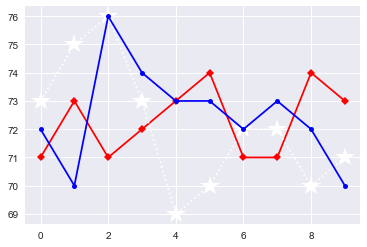

In [31]:
figure, axes = plt.subplots()

# Use diamond markers
axes.plot(np.arange(0,10), nd_football_roster['Height'][:10], 
          marker='D', markersize=5, color="Red")

# You can combine linestyle and markers
# Here we will use a star marker
axes.plot(np.arange(0,10), nd_football_roster['Height'][10:20], 
          linestyle='dotted', marker='*', markersize=20, color="#ffffff")

# Circle Markers
axes.plot(np.arange(0,10), nd_football_roster['Height'][20:30],
          marker='o', markersize=5, color="Blue")

### Adjusting Axes Limits
If we go back to our original plot, we can see that Matplotlib automatically sets the limits of the x-axis and y-axis values based on the data that we give it.

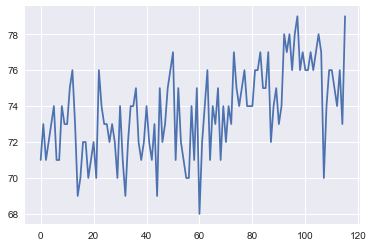

In [32]:
figure, axes = plt.subplots()
axes.plot(np.arange(0, 116), nd_football_roster['Height'])

You do not have to accept these default values however. Using the *`set_xlim`* and *`set_ylim`* methods of the **`axes`** object, we can visually focus on a subset of the data.

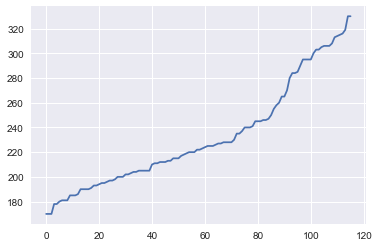

In [33]:
figure, axes = plt.subplots()

# Let's display the sorted the weights of the players on the team.
axes.plot(np.arange(0, 116), 
          nd_football_roster['Weight'].sort_values())

(70, 90)

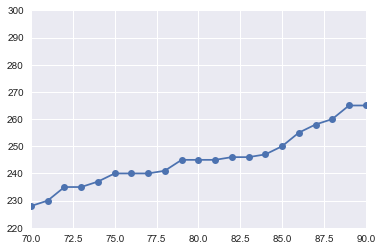

In [34]:
figure, axes = plt.subplots()

# And then use the `set_ylim` method to focus in on the players 
# who weigh between 220 and 300 lbs and whose x-axis values
# are between 70 and 90
axes.plot(np.arange(0, 116), 
          nd_football_roster['Weight'].sort_values(), 
          marker='o')

axes.set_ylim(220, 300)
axes.set_xlim(70, 90)

<div class="alert alert-block alert-warning">
<h5>Misleading Graph: Setting limits to x-axis and y-axis</h5>
<p> </p> 
<p>
It is very easy to mislead with data visualizations by setting (or not setting) the limits to the axes. Look at the following example. I recommend to use the scale that makes sense in the current context 
</p>
</div> 

(0, 100)

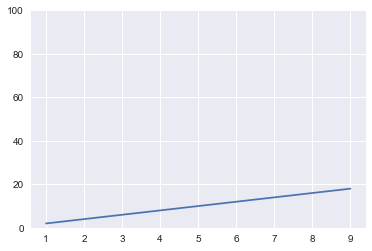

In [35]:
months = np.arange(1,10)
profits = 2*months

figure, axes = plt.subplots()
axes.plot(months, profits)
axes.set_ylim(0, 100)

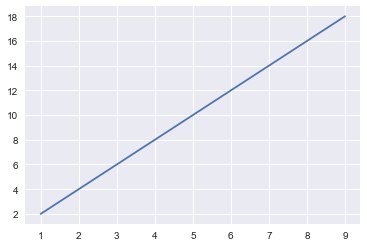

In [36]:
months = np.arange(1,10)
profits = 2*months

figure, axes = plt.subplots()
axes.plot(months, profits)

### Adding Plot Metadata (Labels)
Now that we've covered the basics of plotting lines, let's turn our attention to adding plot metadata.

#### Plot Titles

Text(0.5, 1.0, '2018 ND Football Player Heights')

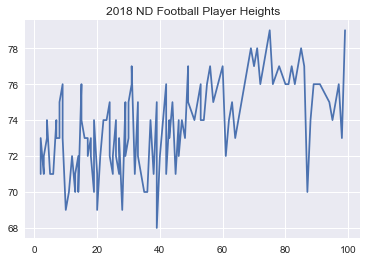

In [37]:
# Add plot title with axes.set_title() method.
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])
axes.set_title(label='2018 ND Football Player Heights')

Text(1.0, 1.0, 'Player Heights')

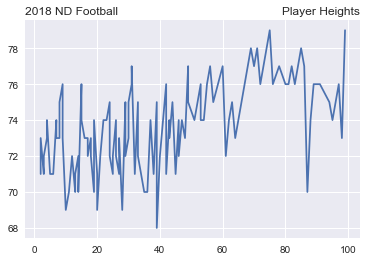

In [38]:
# You can adjust the horizontal alignment 
# of the title with the `loc` parameter.
# The value must be one of the following: left, center, right
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

# Notice that if you specify location, 
# you can have multiple titles.
axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

Text(1.0, 1.0, 'Player Heights')

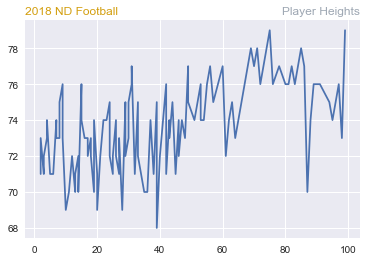

In [39]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

# Here we will adjust the color and alpha properties
axes.set_title(label='2018 ND Football', loc='left', color='#d39f10')
axes.set_title(label='Player Heights', loc='right', 
               color='#0c2340', alpha=.4)

#### Axis Labels
Are plot is starting to look pretty cool, but we don't really know what the units of measurement are. We can fix that with the *`set_ylabal()`* and *`set_xlabel`* methods.

Text(0.5, 0, 'Jersey #')

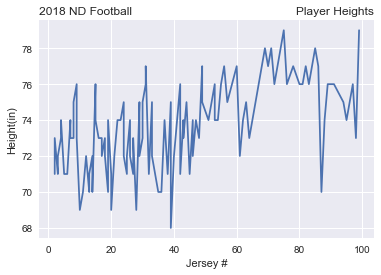

In [40]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

With that additional information, our plot can be understood by other users. You can also control the color and opacity of these labels just as you can with the plot titles:

Text(0.5, 0, 'Jersey #')

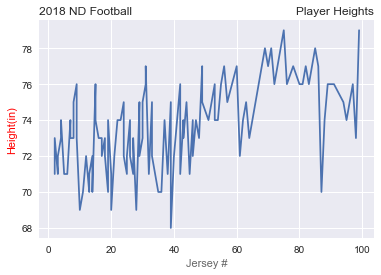

In [41]:
figure, axes = plt.subplots()
axes.plot(nd_football_roster.index, nd_football_roster['Height'])

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)', color='red')
axes.set_xlabel('Jersey #', alpha=.7)

#### Plot Legends
In order to complete our plot, we need one more thing: a legend.
Like most things in Matplotlib, adding a basic one is simple - but with many customization options.

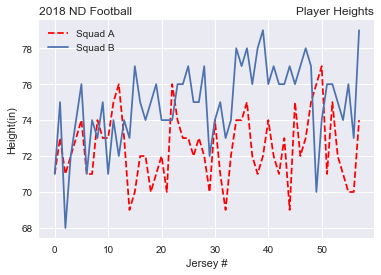

In [42]:
figure, axes = plt.subplots()

# We set the labels for each line.
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', 
          label='Squad A', color="red")
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Initialize the plot legend 
axes.legend()

Let's take note of a few things that Matplotlib does for the default legend:
1. It generates a legend item from each plotted line using the `label` attribute.
2. It matches the style of the line with the style in the legend.
3. It derives the name of each legend from the data being plotted (if
possible).

There are a number of other arguments/parameters that you can specify to further customize plot legends. Let's go over a few of them:

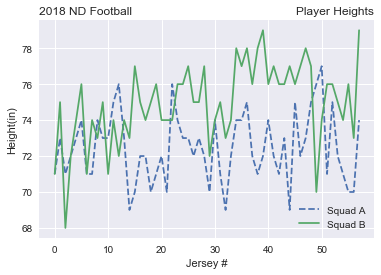

In [43]:
figure, axes = plt.subplots()

# We set the labels for each line.
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use the `loc` argument to control where the
# legend appears in your plot. Valid options:
# upper left, upper center, upper right
# center left, center, center right
# lower left, lower center, lower right
axes.legend(loc='lower right')

You can set a title for the legend itself:

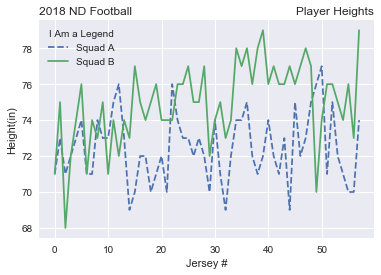

In [44]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

axes.legend(title='I Am a Legend')

You can add edges and background colors to a legend:

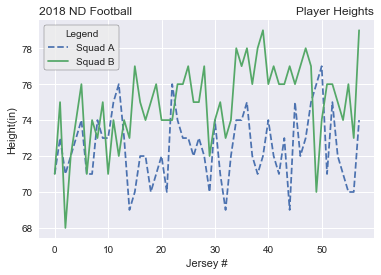

In [45]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# You can specify background and edge colors for the 
# legend if you also specify `frameon=True`
axes.legend(title='Legend', frameon=True, 
            edgecolor='black', facecolor='#ececec')

You can adjust the number of columns in a legend. This is handy if you want the legend to take up less vertical space.

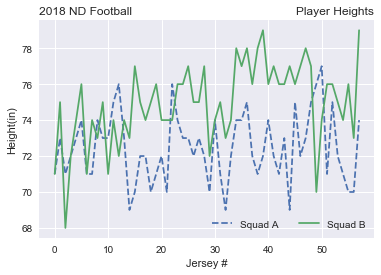

In [46]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use the `ncol` argument to specify the
# number of columns.
axes.legend(ncol=2, loc='lower right')

And finally, you can adjust the size of the font used in the legend:

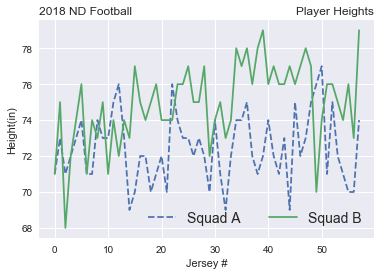

In [47]:
figure, axes = plt.subplots()
axes.plot(np.arange(0,58), nd_football_roster['Height'][:58], 
          linestyle='--', label='Squad A')
axes.plot(np.arange(0,58), nd_football_roster['Height'][58:], 
          label='Squad B')

axes.set_title(label='2018 ND Football', loc='left')
axes.set_title(label='Player Heights', loc='right')

axes.set_ylabel('Height(in)')
axes.set_xlabel('Jersey #')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='lower right', fontsize=14)

<div class="alert alert-block alert-warning">
## Important things to keep in mind while plotting simple line plots
</div>
1. Make sure your data appears appropriately with xlim and ylim
2. Line properties
    * color
    * linestyle
    * linewidth
    * marker
3. Plot Metadata
    * set_title
    * set_xlabel, set_ylabel
    * legend

# Activity

In this activity we will again use the flight_sample.csv dataset. We will learn both the group by and plotting the data. 

### GroupBy 'MONTH' and Plotting

We want to see if the month of travel has any effect on average distance traveled by airline customers

1. Compute the average DISTANCE per 'MONTH'
2. Visualize the average distance travelled and the month
    * Plot with x-axis as the month and y-axis as the average distance traveled
    * Make sure you set the title, xlabel, ylabel. 

In [ ]:
flights.head()

In [51]:
# get average distance by month
flights_by_month = flights.groupby(['MONTH'])
distance_by_month = flights_by_month['DISTANCE'].mean()
distance_by_month[:2]

MONTH
1    806.716364
2    824.393464
Name: DISTANCE, dtype: float64

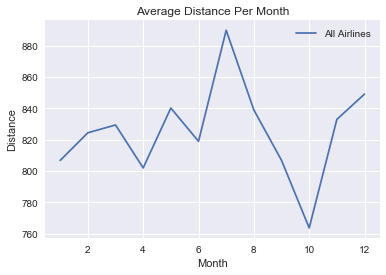

In [57]:
# plot with meta data (x and y labels, legend, and title)
fig,ax = plt.subplots()
ax.plot(distance_by_month, label="All Airlines")
ax.set_title(label="Average Distance Per Month")
ax.set_ylabel("Distance")
ax.set_xlabel("Month")
ax.legend()


### GroupBy 'MONTH' and Plotting

We will do the similar analysis as above, but separately for two airlines, United Airlines (UA) and Hawaiin Airlines (HA)

1. Compute the median DISTANCE per 'MONTH' for United Airlines and Hawaiin Airlines separately 
2. Visualize the median distance travelled and the month by United Airlines and Hawaiin Airlines 
    * Plot with x-axis as the month and y-axis as the median distance traveled
    * Plot metadata
        * Set the title
        * xlabel and ylabel
        * Give United Airlines a green color and Hawaiin Airlines a red color
        * Give appropriate legend indicating the lines for United and Hawaiin Airlines

In [ ]:
# get the median distance by airline and month


In [ ]:
# get the data for two specific airlines


In [ ]:
# Plot HA and WN Distance, Set titles, x & y labels, and legend
